<a href="https://colab.research.google.com/github/mifm/examples/blob/master/cable_layout_with_edwin_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install TOPFARM/PyWake**

In [1]:
!pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

  Cloning https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git to /tmp/pip-req-build-jbc8n6zb
  Running command git clone --filter=blob:none --quiet https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git /tmp/pip-req-build-jbc8n6zb
  Resolved https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git to commit c9dea981204b8c67073ff0ca8ffd39182e21de97
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 999.7 kB/s eta 0:00:00
  Created wheel for py_wake: filename=py_wake-2.5.1.dev61+gc9dea98-py3-none-any.whl size=97195874 sha256=b96694d994af0833fa6024d790c4dcc262b18b54bc338f74d201732e48c9b02a
  Stored in directory: /tmp/pip-ephem-wheel-cache-vkw9trk3/wheels/eb/a5/d1/e7380004c5b927c92dd3bfb3a466983ecefc2e7119756db77d
Successfully built py_wake



---


**Install TOPFARM/Edwin**

In [2]:
!pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/edwin.git#egg=ed_win[interarray]

DEPRECATION: git+https://gitlab.windenergy.dtu.dk/TOPFARM/edwin.git#egg=ed_win[interarray] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Cloning https://gitlab.windenergy.dtu.dk/TOPFARM/edwin.git to /tmp/pip-install-hb2azjmi/ed-win_8393beccedc548e4a505272cf87d1454
  Running command git clone --filter=blob:none --quiet https://gitlab.windenergy.dtu.dk/TOPFARM/edwin.git /tmp/pip-install-hb2azjmi/ed-win_8393beccedc548e4a505272cf87d1454
  Resolved https://gitlab.windenergy.dtu.dk/TOPFARM/edwin.git to commit 517099b186a093556129aa75c968924861f9b9b1
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━



---


**Import Necessary module and functions**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from ed_win.wind_farm_network import WindFarmNetwork



---


**Load Wind Turbine locations from PyWake (Wind Farm Layout Optimization)**

In [4]:
from py_wake.validation.lillgrund import wt_x, wt_y



---


**Cable Layout Optimization with Edwin using default solver**


In [5]:
turbines_pos=np.asarray([wt_x, wt_y]).T
substations_pos = np.asarray([[359470], [6153890]]).T

cables = np.array([[500, 3, 100], [800, 5, 150], [1000, 10, 250]])

wfn = WindFarmNetwork(turbines_pos=turbines_pos, substations_pos=substations_pos, cables=cables)
# Here we use the default format of the inputs (which is passing coordinates directly to the function).
# If we had the data in other formats (graph or yaml file), we could pass them to the function as follows:
# with Graph: wfn = WindFarmNetwork.from_graph(G, cables=cables)
# with Yaml file: wfn = WindFarmNetwork().from_windIO(yaml_path, cables=cables)

G1 = wfn.optimize()
# The output of the optimize() method will be a graph.
# If other output formats (e.g. table, yaml file) is preferred, we can define the format as follows:
# For table: T = wfn.optimize(output_format == 'table')
# For Yaml file: Y = wfn.optimize(output_format == 'yaml')

Solving with heuristic(cpew)



can you say what is the default solver based on the output of the optimization?



---

**Plot the optimized layout**

<Axes: >

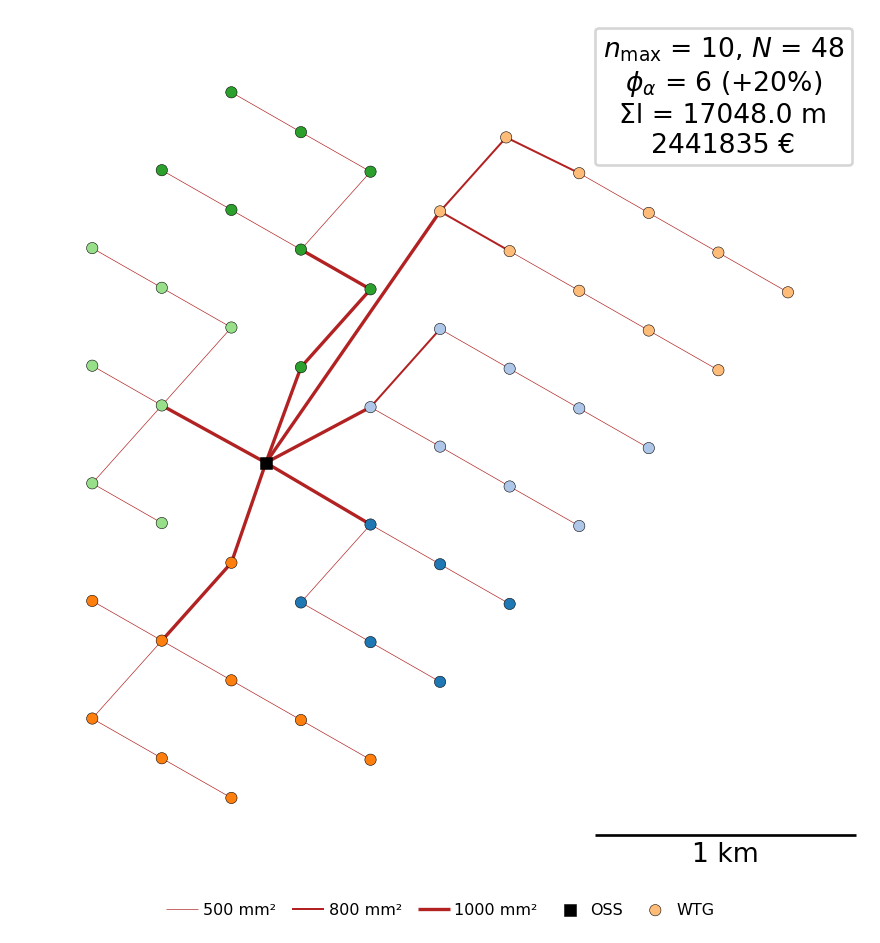

In [6]:
G1.plot()



---


**Cable Layout Optimization with Edwin using Ortools as the solver**


In [7]:
from ed_win.wind_farm_network import InterArrayDriver
# choose the driver (interarray with settings)
interarray_setting = {
    'solver_name': 'ortools(cp-sat)',
    # choose between cplex, cbc, ortools(cp-sat), heuristic(cpew), heuristic(obew) (to be added: guroubi, highs, scip)
    'gap': 0.1,  # gab between best possible layout and the incumbent
    'timelimit': 2000,  # seconds
    'other_settings': {'tee': True, 'gateXings_constraint': True}
    }
wfn = WindFarmNetwork(turbines_pos=turbines_pos, substations_pos=substations_pos, cables=cables, drivers=[InterArrayDriver(**interarray_setting)])
G2 = wfn.optimize()

Solving with ortools(cp-sat)


Starting CP-SAT solver v9.9.3963
Parameters: max_time_in_seconds: 2000 log_search_progress: true relative_gap_limit: 0.1
Setting number of workers to 2

Initial optimization model '': (model_fingerprint: 0xaeb17e84b034d3e9)
#Variables: 500 (#bools: 250 in floating point objective)
  - 250 Booleans in [0,1]
  - 202 in [-9,9]
  - 48 in [0,10]
#kAtMostOne: 613 (#literals: 1'221)
#kLinear1: 500 (#enforced: 500)
#kLinearN: 99 (#terms: 1'250)

Starting presolve at 0.01s
[Scaling] Floating point objective has 250 terms with magnitude in [306.317, 2103.14] average = 611.839
[Scaling] Objective coefficient relative error: 2.83292e-09
[Scaling] Objective worst-case absolute error: 6.6066e-05
[Scaling] Objective scaling factor: 524288
  5.41e-04s  0.00e+00d  [DetectDominanceRelations] 
  9.23e-03s  0.00e+00d  [PresolveToFixPoint] #num_loops=2 #num_dual_strengthening=1 
  8.67e-05s  0.00e+00d  [ExtractEncodingFromLinear] #potential_supersets=565 
[Symmetry] Graph for

<Axes: >

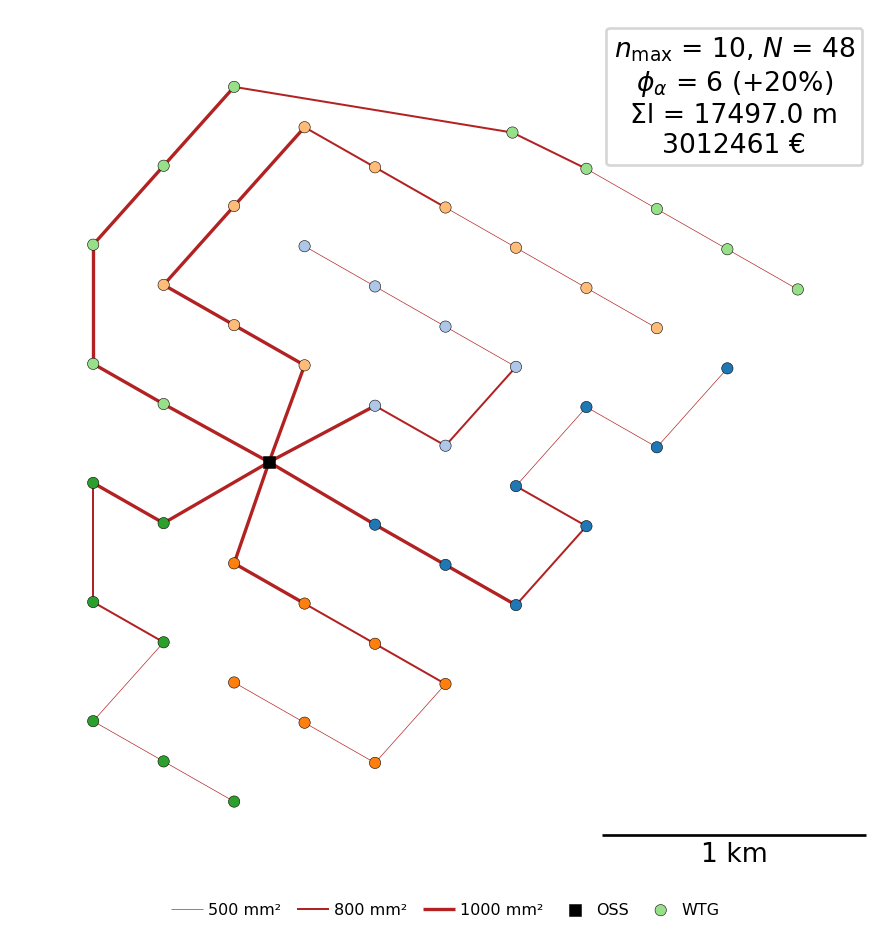

In [8]:
# Plot the optimized layout with ortools
G2.plot()



---


**Change substation positon and Evaluate the layout**

Here we just make an example for illustration purposes (In reality, evaluate method is better to be used for small displacements in the coordinates). Here we move the substation position such that it can be easily observed on the plot.

Evaluate:


<Axes: >

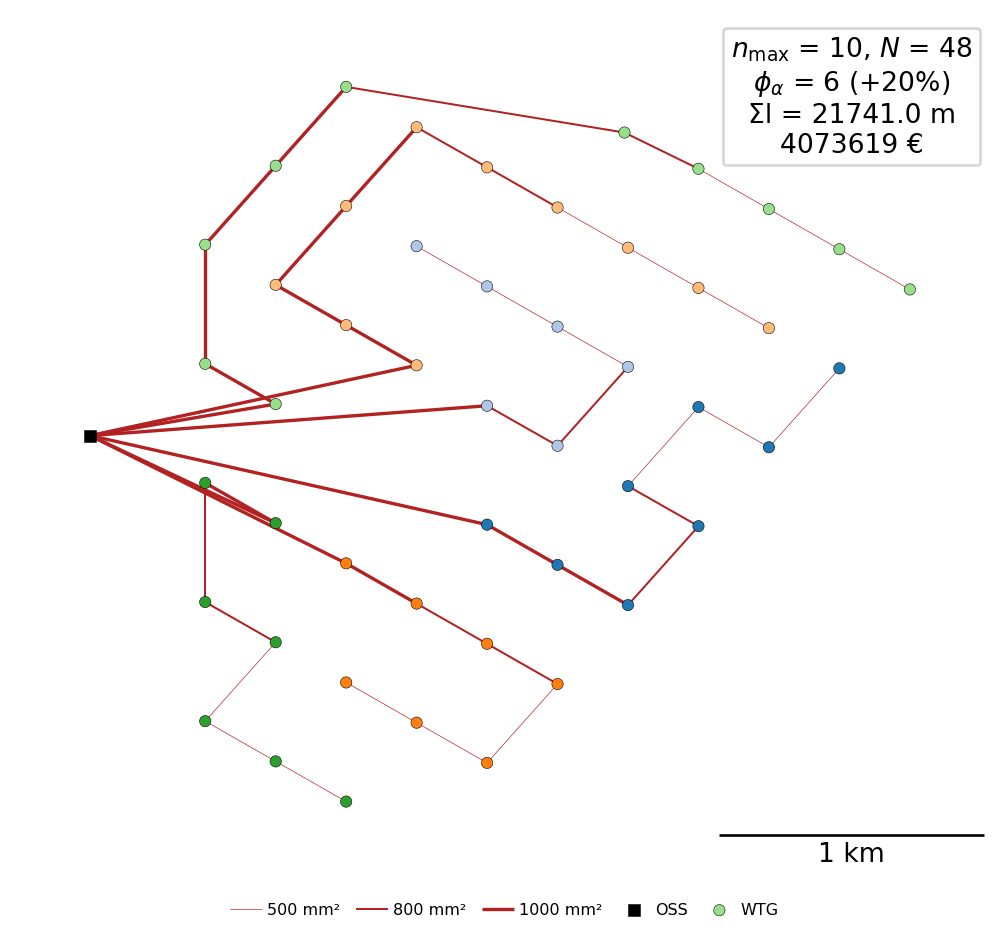

In [9]:
substations_pos = np.asarray([[358370], [6153990]]).T
print('Evaluate:')
G3 = wfn.evaluate(substations_pos=substations_pos)
G3.plot()



---


**Run evaluation without any input.**

Which coordinate are used for evaluation?

<Axes: >

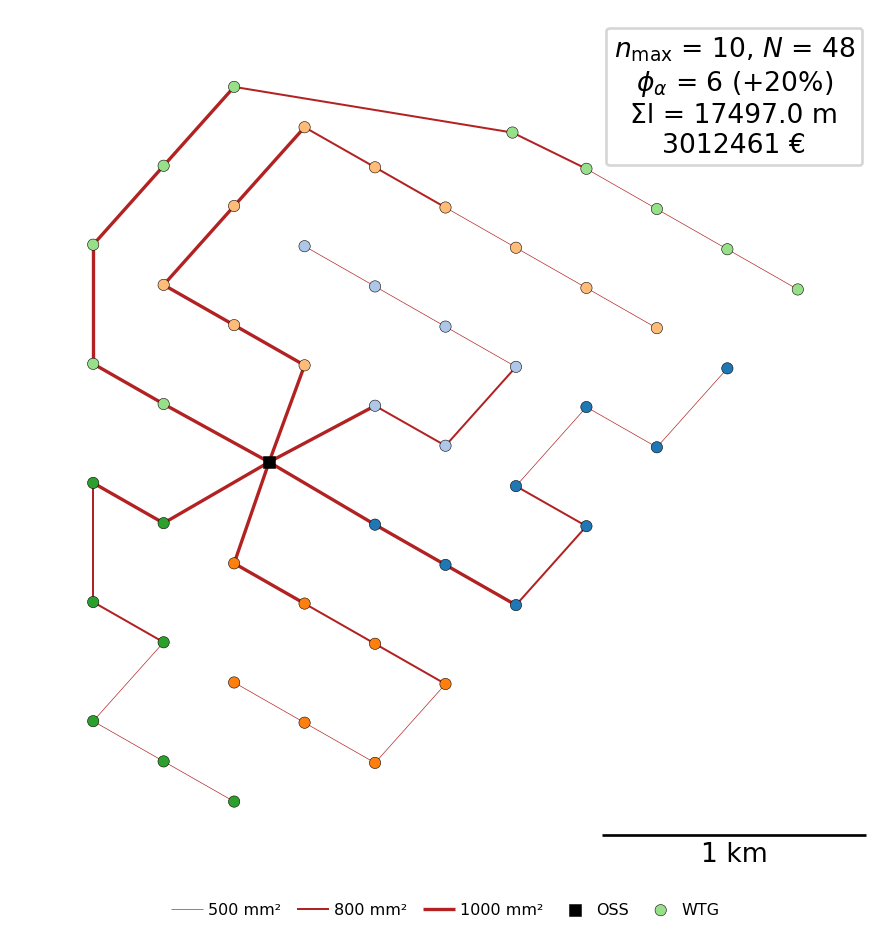

In [10]:
G4 = wfn.evaluate()
G4.plot()



---


**Evaluate and set update_selfG to True**

Evaluate:


<Axes: >

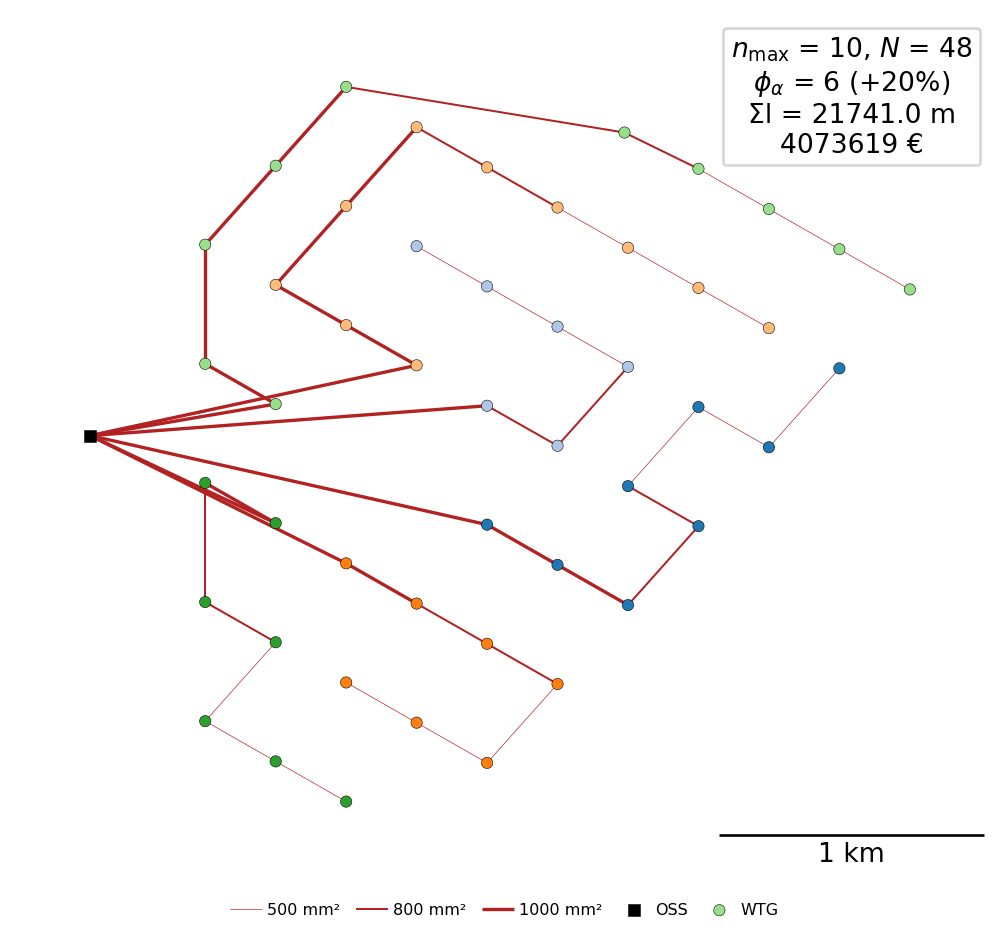

In [11]:
substations_pos = np.asarray([[358370], [6153990]]).T
print('Evaluate:')
G5 = wfn.evaluate(substations_pos=substations_pos, update_selfG=True)
G5.plot()



---


**Run evaluation without any input.**


Which coordinate are used for evaluation?

<Axes: >

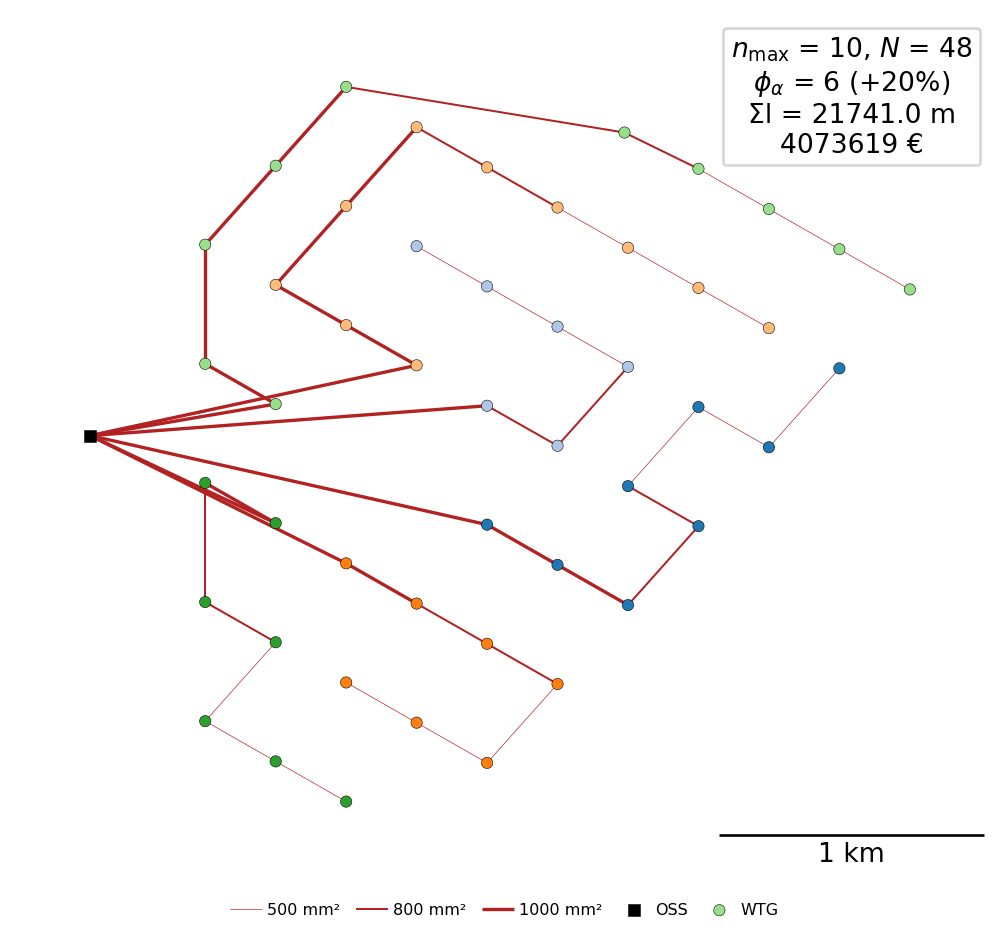

In [12]:
G6 = wfn.evaluate()
G6.plot()

End of the exercise


---

